# Impact of Double Screening Travellers for Varying Diseases

----

This notebook is to be used to obtain detection rates from the updated BoarderScreening code contained in the SIRA package. As such, this work, as opposed to that contained in the `BorderScreening` notebook, looks to take advantage of the newly added functionaltiy that allows the user to model all incoming travellers undertaking a period of additional isolation after arrival into the destination country. The model then reports the proportion of infected travellers (those that successfully board their flight) that will be detected by testing adminisitered either on arrival, or at the end of their self-isolation period. We then plan to report the data obtained by this updated model in paper which is to follow up the original border screening article. In this new paper, we plan to compare the results of the two models and determine what affect requiring all incoming travellers to complete a period of self-isolation has on detection rates during a disease outbreak outbreaks.

Aside from assessing a range of diseases, we shall also be varying flight time to model situations where the outbreak has occured in countries of varying distance away from the destination country.

In [1]:
from sira import border_screening
import matplotlib.pyplot as plt
import numpy.random as rand
import scipy.stats as stats
import pandas as pd
import numpy as np
import os

In [4]:
flight_ranges = [(3,5), (9,11), (15,17)]

exp_ranges = []

diseases =['Ebola', 'SARS', 'Influenza', 'COVID-19']

inc_dists = {'Ebola':stats.gamma, 'SARS':stats.weibull_min, 'Influenza':stats.gamma, 
             'COVID-19': stats.lognorm}

inc_params = {'Ebola':{'a':8.27054, 'scale': 1.51139}, 
              'SARS':{'c':2.59, 'scale':5.8}, 
              'Influenza':{'a':4.7556, 'scale':0.3007},
              'COVID-19': {'s':0.47238, 'scale': np.exp(1.6112)}}

### Incubation period distributions

We now quickly test that these distributions look as they should. We therefore quickly draw the dstributions described above to see how they appear.

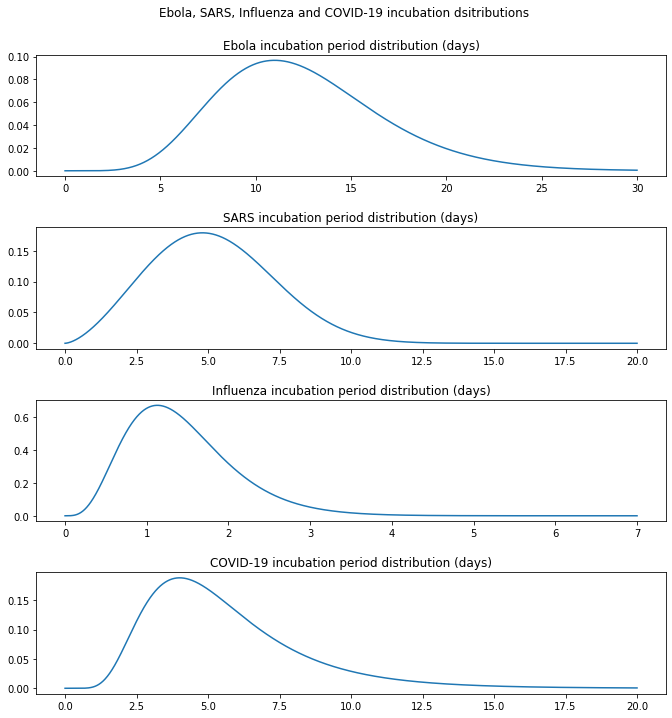

In [3]:
import matplotlib.pyplot as plt

dists_graphs = []
time_range = {'Ebola': np.linspace(0, 30, 10000), 'SARS': np.linspace(0, 20, 10000), 'Influenza': np.linspace(0, 7, 10000),
              'COVID-19': np.linspace(0, 20, 10000)}

fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1)
fig.set_size_inches(10,10)
fig.tight_layout(pad=3.0)

ax = {'Ebola': ax1, 'SARS': ax2, 'Influenza': ax3, 'COVID-19': ax4}
fig.suptitle('Ebola, SARS, Influenza and COVID-19 incubation dsitributions', y =1.02)

for dis in diseases:
    ax[dis].plot(time_range[dis], inc_dists[dis].pdf(time_range[dis], **inc_params[dis]))
    ax[dis].set_title('{} incubation period distribution (days)'.format(dis))
    
plt.show()

In [7]:
# Values to describe the upper limit to the windows in which travellers have been infected prior to boarding their
# flights

border_shut = [72, 168, 336]

# Values to describe the different times that travellers will be required to isolate for in different scenarios   
isolation_times = [3*24, 5*24, 7*24, 10*24, 14*24]

In [5]:
df = pd.DataFrame(columns=['Disease name', 
                                     'Flight time range',
                                     'Exposure time range (time before flight)',
                                     'Self-isolation period (hours)',
                                     'Calculated border screening success rate'], index=range(1,181))

In [6]:
for i in range(45):
    fly = flight_ranges[i % 3]
    exp = border_shut[(int(np.floor(i / 3)) % 3)]
    iso = isolation_times[int(np.floor(i/9))]

    screening = border_screening(num_people = 100000,
                              flight_dist = rand.uniform,
                              exp_dist = rand.uniform,
                              inc_dist = rand.gamma, 
                              time_scale = 'days',
                              second_screen = iso,
                              release_time = iso+0.0001,
                              **{
                                 'exp':{'low':0, 'high':exp},
                                 'inc':{'shape':8.27054, 'scale':1.51139},
                                 'flight':{'low':fly[0], 'high':fly[1]}
                                 }
                              )

    df.loc[i+1] = pd.Series({'Disease name': 'Ebola', 
                                       'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp),
                                       'Flight time range': 'Uniform {}'.format(fly), 
                                       'Self-isolation period (hours)': iso,
                                       'Calculated border screening success rate': screening})

In [7]:
for i in range(45):
    fly = flight_ranges[i % 3]
    exp = border_shut[(int(np.floor(i / 3)) % 3)]
    iso = isolation_times[int(np.floor(i/9))]
                          
    screening = border_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.weibull, 
                          time_scale = 'days',
                          second_screen = iso,
                          release_time = iso+0.0001,
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'c':2.59, 'scale':5.8},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+46] = pd.Series({'Disease name':'SARS', 
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Self-isolation period (hours)': iso,
                           'Calculated border screening success rate': screening})

In [8]:
for i in range(45):
    fly = flight_ranges[i % 3]
    exp = border_shut[(int(np.floor(i / 3)) % 3)]
    iso = isolation_times[int(np.floor(i/9))]                          
 
    screening = border_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.gamma, 
                          time_scale = 'days',
                          second_screen = iso,
                          release_time = iso+0.0001,     
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'shape':4.7556, 'scale':0.3007},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+91] = pd.Series({'Disease name':'Influenza', 
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Self-isolation period (hours)': iso,
                           'Calculated border screening success rate': screening})

In [9]:
for i in range(45):
    fly = flight_ranges[i % 3]
    exp = border_shut[(int(np.floor(i / 3)) % 3)]
    iso = isolation_times[int(np.floor(i/9))]
                          
    screening = border_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.lognormal, 
                          time_scale = 'days',
                          second_screen = iso,
                          release_time = iso+0.0001,
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'sigma':0.47238, 'mean': 1.6112},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             }
                          )
                          
    df.loc[i+136] = pd.Series({'Disease name':'COVID-19', 
                           'Flight time range': 'Uniform {}'.format(fly), 
                           'Exposure time range (time before flight)': 'Uniform (0, {})'.format(exp), 
                           'Self-isolation period (hours)': iso,
                           'Calculated border screening success rate': screening})

In [11]:
cwd_path = os.getcwd()
save_path = os.path.join(cwd_path, 'DoubleScreening_VaryingDisease.csv')

df.to_csv(save_path)

In [12]:
df

,Disease name,Flight time range,Exposure time range (time before flight),Self-isolation period (hours),Calculated border screening success rate
1,Ebola,"Uniform (3, 5)","Uniform (0, 72)",72,0.0145015
2,Ebola,"Uniform (9, 11)","Uniform (0, 72)",72,0.0174916
3,Ebola,"Uniform (15, 17)","Uniform (0, 72)",72,0.0235121
4,Ebola,"Uniform (3, 5)","Uniform (0, 168)",72,0.0887987
5,Ebola,"Uniform (9, 11)","Uniform (0, 168)",72,0.10105
...,...,...,...,...,...
176,COVID-19,"Uniform (9, 11)","Uniform (0, 168)",336,0.994013
177,COVID-19,"Uniform (15, 17)","Uniform (0, 168)",336,0.994014
178,COVID-19,"Uniform (3, 5)","Uniform (0, 336)",336,0.993342
179,COVID-19,"Uniform (9, 11)","Uniform (0, 336)",336,0.994046


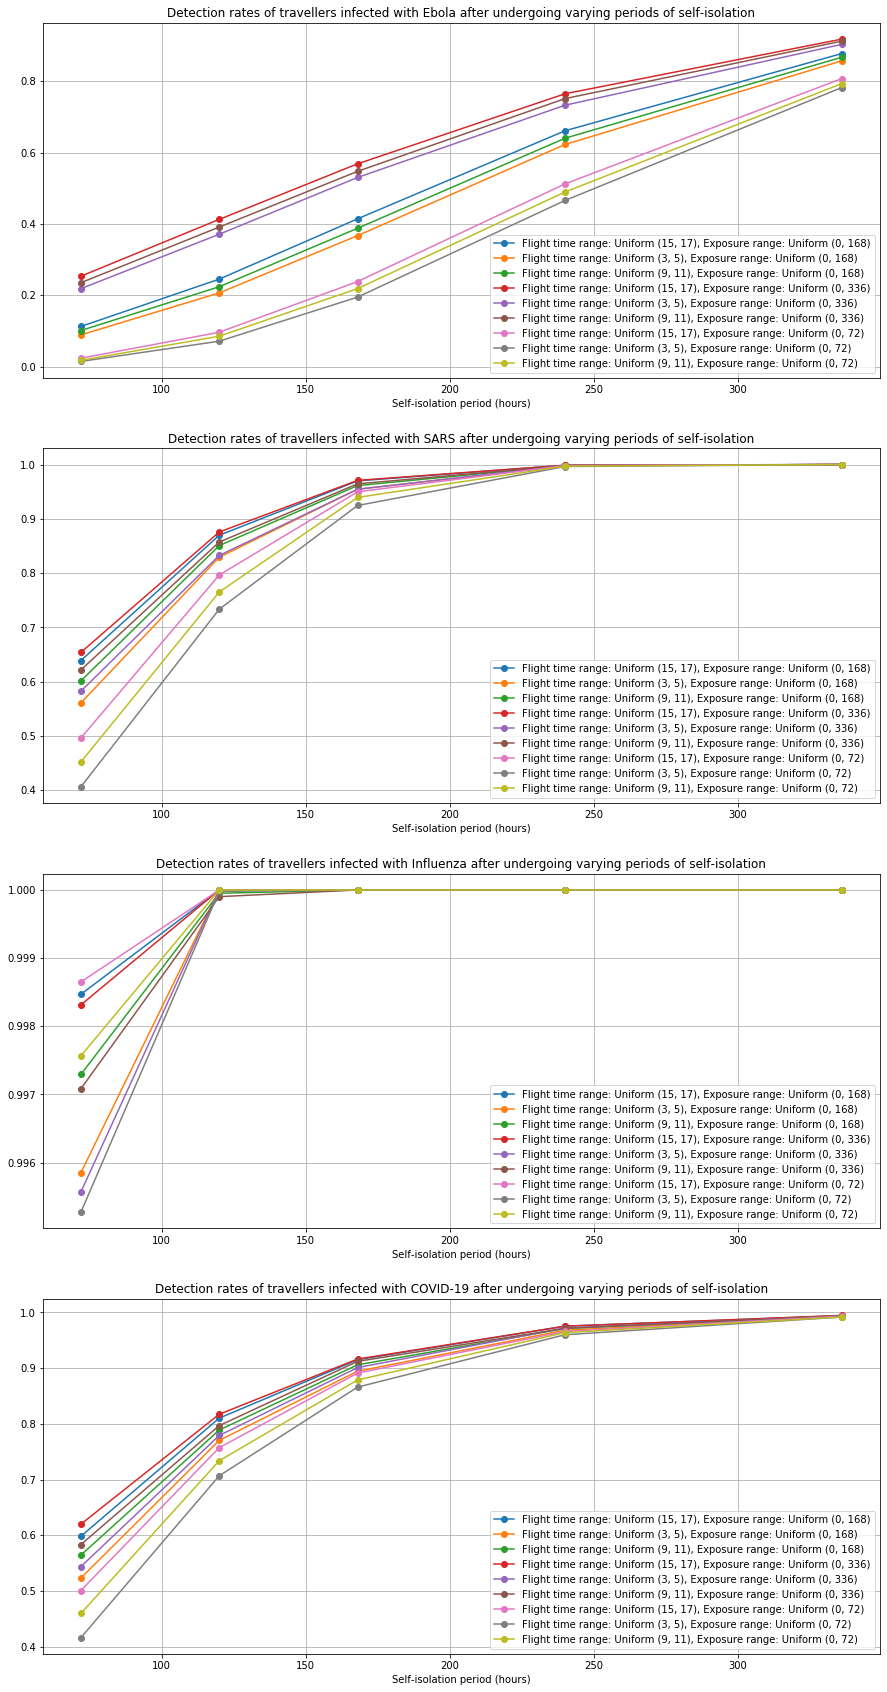

In [27]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize=(15,30))
ax = [ax1, ax2, ax3, ax4]

for i in range(4):
    name = diseases[i]
    mask = df['Disease name'] == name
    name_subdf = df[mask]
    for ranges, group in name_subdf.groupby(['Exposure time range (time before flight)', 'Flight time range']):
        group.plot(style='o-', x='Self-isolation period (hours)',
               y='Calculated border screening success rate',
               ax=ax[i],
               title = 'Detection rates of travellers infected with {} after undergoing varying periods of self-isolation'.format(name),
               grid=True,
               label = 'Flight time range: {}, Exposure range: {}'.format(ranges[1], ranges[0]))

In [2]:
df2 = pd.DataFrame(columns=['Flight time range',
                            'Exposure time range',
                            'Self-isolation period',
                            'Screening success rate'])

In [12]:
import itertools

res = []
ind = 1

for iso, fly, exp in itertools.product([0, 3*24, 5*24, 7*24, 10*24, 14*24], flight_ranges, border_shut):
                          
    screening = border_screening(num_people = 100000,
                          flight_dist = rand.uniform,
                          exp_dist = rand.uniform,
                          inc_dist = rand.lognormal, 
                          time_scale = 'days',
                          second_screen = iso,
                          release_time = iso+0.0001,
                          reporting=False,
                          **{
                             'exp':{'low':0, 'high':exp},
                             'inc':{'sigma':0.47238, 'mean': 1.6112},
                             'flight':{'low':fly[0], 'high':fly[1]}
                             })
                                 
    df2.loc[ind] = pd.Series({'Flight time range': '{}'.format(fly), 
                           'Exposure time range': 'Uniform (0, {})'.format(exp), 
                           'Self-isolation period': iso,
                           'Screening success rate': screening})
    ind += 1

In [12]:
cwd_path = os.getcwd()
save_path = os.path.join(cwd_path, 'temp_DoubleScreening.csv')

df2.to_csv(save_path)

In [13]:
df2

,Flight time range,Exposure time range,Self-isolation period,Screening success rate
1,"(3, 5)","Uniform (0, 72)",0,0.008368
2,"(3, 5)","Uniform (0, 168)",0,0.026690
3,"(3, 5)","Uniform (0, 336)",0,0.030495
4,"(9, 11)","Uniform (0, 72)",0,0.025940
5,"(9, 11)","Uniform (0, 168)",0,0.066185
6,"(9, 11)","Uniform (0, 336)",0,0.073799
7,"(15, 17)","Uniform (0, 72)",0,0.044060
8,"(15, 17)","Uniform (0, 168)",0,0.105393
9,"(15, 17)","Uniform (0, 336)",0,0.118360
10,"(3, 5)","Uniform (0, 72)",72,0.418200


In [14]:
df2.groupby('Self-isolation period').mean()

,Screening success rate
Self-isolation period,
0,0.055477
72,0.533779
120,0.773785
168,0.898254
240,0.968939
336,0.993117
